In [1]:
import os
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns

import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [ ]:
#TRY OUTS OF MULTIPLE REGRESSION - LORENA BRAMBILA 

In [2]:
info_2011=pd.read_csv('ward-atlas-data-1.csv')

In [3]:
info_2011.head(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Population and Age; Population Estimates and Projections; 2001,Population and Age; Population Estimates and Projections; 2006,Population and Age; Population Estimates and Projections; 2011,Population and Age; Population Estimates and Projections; 2013,Population and Age; Population Estimates and Projections; 2014,Population and Age; Population Estimates and Projections; 2015,...,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2007/2008,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2008/2009,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2009/2010,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2010/2011,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2011/2012,Election turnout; Turnout Borough election; 2006,Election turnout; Turnout Borough election; 2010,Election turnout; Turnout Borough election; 2014,Election turnout; Turnout Mayoral election; 2008,Election turnout; Turnout Mayoral election; 2012
0,Codes,New Code,Borough,Names,2001,2006,2011,2013,2014,2015,...,2007/2008,2008/2009,2009/2010,2010/2011,2011/2012,2006.0,2010.0,2014.0,2008.0,2012.0
1,00AA,E09000001,City of London,City of London,7350,7254,7400,7993,8043,8102,...,800,730,580,780,805,NaN,NaN,NaN,47.6,48.5


In [4]:
for col in info_2011.columns:
    print (col)
    

Unnamed: 0
Unnamed: 1
Unnamed: 2
Unnamed: 3
Population and Age; Population Estimates and Projections; 2001
Population and Age; Population Estimates and Projections; 2006
Population and Age; Population Estimates and Projections; 2011
Population and Age; Population Estimates and Projections; 2013
Population and Age; Population Estimates and Projections; 2014
Population and Age; Population Estimates and Projections; 2015
Population and Age; Population Estimates and Projections; 2016
Population and Age; Population Estimates and Projections; 2018
Population and Age; Population Estimates and Projections; 2023
Population and Age; Population Estimates and Projections; 2028
Population and Age; Age structure (percentage) - 2013; Aged 0-15
Population and Age; Age structure (percentage) - 2013; Aged 16-64
Population and Age; Age structure (percentage) - 2013; Aged 65+
Population and Age; Aged 0-15; 2002
Population and Age; Aged 0-15; 2004
Population and Age; Aged 0-15; 2006
Population and Age; Age

In [5]:
#not important
#info_2011[info_2011.iloc[:,0].str.contains('2011')]

In [6]:
spike_cols = [col for col in info_2011.columns if not '2011' in col]
len(spike_cols)
spike_cols

['Unnamed: 0',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Population and Age; Population Estimates and Projections; 2001',
 'Population and Age; Population Estimates and Projections; 2006',
 'Population and Age; Population Estimates and Projections; 2013',
 'Population and Age; Population Estimates and Projections; 2014',
 'Population and Age; Population Estimates and Projections; 2015',
 'Population and Age; Population Estimates and Projections; 2016',
 'Population and Age; Population Estimates and Projections; 2018',
 'Population and Age; Population Estimates and Projections; 2023',
 'Population and Age; Population Estimates and Projections; 2028',
 'Population and Age; Age structure (percentage) - 2013; Aged 0-15',
 'Population and Age; Age structure (percentage) - 2013; Aged 16-64',
 'Population and Age; Age structure (percentage) - 2013; Aged 65+',
 'Population and Age; Aged 0-15; 2002',
 'Population and Age; Aged 0-15; 2004',
 'Population and Age; Aged 0-15; 2006',
 'Populati

In [7]:
info_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Columns: 946 entries, Unnamed: 0 to Election turnout; Turnout Mayoral election; 2012
dtypes: float64(378), int64(233), object(335)
memory usage: 4.5+ MB


In [8]:
info_2011.drop(list(info_2011.filter(spike_cols)), axis = 1, inplace = True)

In [9]:
info_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Columns: 171 entries, Population and Age; Population Estimates and Projections; 2011 to Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2011/2012
dtypes: float64(38), int64(26), object(107)
memory usage: 840.4+ KB


In [10]:
for col in info_2011.columns:
    print (col)

Population and Age; Population Estimates and Projections; 2011
Population and Age; Aged 0-15; 2011
Population and Age; Aged 16-64; 2011
Population and Age; Aged 65+; 2011
Population and Age; All ages; 2011
Population and Age; Mean age; 2011
Population and Age; Median age; 2011
Area and Density; Population density (persons per sq km); 2011 (Census)
Diversity; Ethnic Group 5 groups - 2011 Census; White
Diversity; Ethnic Group 5 groups - 2011 Census; Mixed
Diversity; Ethnic Group 5 groups - 2011 Census; Asian or Asian British
Diversity; Ethnic Group 5 groups - 2011 Census; Black or Black British
Diversity; Ethnic Group 5 groups - 2011 Census; Other
Diversity; Ethnic Group 18 groups - 2011 Census; White British
Diversity; Ethnic Group 18 groups - 2011 Census; White Irish
Diversity; Ethnic Group 18 groups - 2011 Census; White Gypsy or Irish Traveller
Diversity; Ethnic Group 18 groups - 2011 Census; Other White
Diversity; Ethnic Group 18 groups - 2011 Census; Mixed White and Black Caribbean


In [11]:
#info_2011.drop(list(info_2011.filter(regex = 'expectancy')), axis = 1, inplace = True)

In [12]:
#info_2011.info()

In [13]:
#info_2011.drop(list(info_2011.filter(regex = '%')), axis = 1, inplace = True)

In [14]:
#info_2011.info()

In [15]:
#for col in info_2011.columns:
    #print (col)

In [16]:
#filtering objesct columns / not important
#info_2011.loc[:, info_2011.dtypes == np.object]

In [17]:
info_2011.dropna(axis=1, how='any', inplace=True)
info_2011

,Population and Age; Population Estimates and Projections; 2011,Population and Age; Aged 0-15; 2011,Population and Age; Aged 16-64; 2011,Population and Age; Aged 65+; 2011,Population and Age; All ages; 2011,Population and Age; Mean age; 2011,Population and Age; Median age; 2011,Area and Density; Population density (persons per sq km); 2011 (Census),Diversity; Ethnic Group 5 groups - 2011 Census; White,Diversity; Ethnic Group 5 groups - 2011 Census; Mixed,...,Car access; Number of cars or vans in household % - Census 2011; 4 or more cars or vans in household %,Travel to work by bicycle; 2011 Census; All aged 16-74 in work,Travel to work by bicycle; 2011 Census; Travel by bicycle,Travel to work by bicycle; 2011 Census; % travel by bicycle,Workplace employment; Total employment; 2011,Workplace employment; Total employees; 2011,Workplace employment; Number of Full-time employees; 2011,Workplace employment; Number of Part-time employees; 2011,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2010/2011,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2011/2012
0,2011,2011,2011,2011,2011,2011.000000,2011,2011 (Census),White,Mixed,...,4 or more cars or vans in household %,All aged 16-74 in work,Travel by bicycle,% travel by bicycle,2011,2011,2011,2011,2010/2011,2011/2012
1,7400,613,5748,1051,7412,41.572315,39,2312.5,5799,289,...,0.4,4747,252,5.308615968,388600,374100,327200,46900,780,805
2,12900,3189,9165,648,13002,29.432780,29,9884.615385,3596,585,...,0.4,5489,44,0.801603206,8200,7900,5200,2700,1370,1000
3,10450,2760,6620,1082,10462,33.491493,32,7464.285714,7275,362,...,0.7,4214,43,1.020408163,800,800,400,400,260,190
4,11650,2944,7565,1089,11598,33.167098,32,8923.076923,6789,524,...,0.9,4674,77,1.647411211,1200,1100,500,600,400,320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,12750,2776,8743,1193,12712,34.199497,33,18214.28571,6024,848,...,0.1,5284,270,5.109765329,3300,3200,2300,900,510,450
625,10600,850,8552,1156,10558,38.911820,36,5300,7153,532,...,1,6387,217,3.397526225,202500,193200,146200,47000,720,605
626,8217450,1629861,5664416,910130,8204407,35.589074,33,5144.792124,4887435,405279,...,0.9,3998078,161689,4.046495682,4449500,4303700,3166800,1137000,301100,249780
627,53107200,10030130,34347372,8729667,53107169,39.353918,39,407.7025634,45281142,1192879,...,1.925739534,25162721,742675,2.870226157,24062609,23073219,15611800,7461419,636447,541564


In [18]:
info_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Columns: 124 entries, Population and Age; Population Estimates and Projections; 2011 to Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2011/2012
dtypes: float64(9), int64(26), object(89)
memory usage: 609.5+ KB


In [19]:
for col in info_2011.dtypes:
    print (col)

int64
int64
int64
int64
int64
float64
int64
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
int64
float64
int64
float64
object
object
object
object
object
object
object
object
object
object
object
object
object
float64
int64
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
int64
float64
int64
float64
int64
int64
int64
int64
float64
int64
int64
int64
float64
float64
int64
int64
int64
int64
object
object
object
object
object
object
object
object
object
object
int64
int64
int64
int64
object
object


In [20]:
#filtering again by type / not important
#obj_col = info_2011.loc[:, info_2011.dtypes == np.object]
#obj_col

In [21]:
info_clean = info_2011.drop([0], axis=0)

In [22]:
info_clean.head()

,Population and Age; Population Estimates and Projections; 2011,Population and Age; Aged 0-15; 2011,Population and Age; Aged 16-64; 2011,Population and Age; Aged 65+; 2011,Population and Age; All ages; 2011,Population and Age; Mean age; 2011,Population and Age; Median age; 2011,Area and Density; Population density (persons per sq km); 2011 (Census),Diversity; Ethnic Group 5 groups - 2011 Census; White,Diversity; Ethnic Group 5 groups - 2011 Census; Mixed,...,Car access; Number of cars or vans in household % - Census 2011; 4 or more cars or vans in household %,Travel to work by bicycle; 2011 Census; All aged 16-74 in work,Travel to work by bicycle; 2011 Census; Travel by bicycle,Travel to work by bicycle; 2011 Census; % travel by bicycle,Workplace employment; Total employment; 2011,Workplace employment; Total employees; 2011,Workplace employment; Number of Full-time employees; 2011,Workplace employment; Number of Part-time employees; 2011,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2010/2011,Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2011/2012
1,7400,613,5748,1051,7412,41.572315,39,2312.5,5799,289,...,0.4,4747,252,5.308615968,388600,374100,327200,46900,780,805
2,12900,3189,9165,648,13002,29.432780,29,9884.615385,3596,585,...,0.4,5489,44,0.801603206,8200,7900,5200,2700,1370,1000
3,10450,2760,6620,1082,10462,33.491493,32,7464.285714,7275,362,...,0.7,4214,43,1.020408163,800,800,400,400,260,190
4,11650,2944,7565,1089,11598,33.167098,32,8923.076923,6789,524,...,0.9,4674,77,1.647411211,1200,1100,500,600,400,320
5,10100,2462,6023,1556,10041,36.559904,34,2970.588235,6224,473,...,0.8,3916,46,1.174668029,1700,1700,900,800,160,155


In [23]:
#col_obj_2 = info_clean.select_dtypes('object').columns.to_list()
#col_obj_2

In [24]:
info_clean[0:] = info_clean[0:].astype(str).astype(float)
print(info_clean.dtypes)

Population and Age; Population Estimates and Projections; 2011                                float64
Population and Age; Aged 0-15; 2011                                                           float64
Population and Age; Aged 16-64; 2011                                                          float64
Population and Age; Aged 65+; 2011                                                            float64
Population and Age; All ages; 2011                                                            float64
                                                                                               ...   
Workplace employment; Total employees; 2011                                                   float64
Workplace employment; Number of Full-time employees; 2011                                     float64
Workplace employment; Number of Part-time employees; 2011                                     float64
Nat Insurance No. registrations to adult overseas nationals; NINo Registrations; 2

In [25]:
for col in info_clean.dtypes:
    print (col)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [26]:
#exporting to csv 
#info_clean.to_csv('info_clean.csv')

In [27]:
for col in info_clean.columns:
    print (col)

Population and Age; Population Estimates and Projections; 2011
Population and Age; Aged 0-15; 2011
Population and Age; Aged 16-64; 2011
Population and Age; Aged 65+; 2011
Population and Age; All ages; 2011
Population and Age; Mean age; 2011
Population and Age; Median age; 2011
Area and Density; Population density (persons per sq km); 2011 (Census)
Diversity; Ethnic Group 5 groups - 2011 Census; White
Diversity; Ethnic Group 5 groups - 2011 Census; Mixed
Diversity; Ethnic Group 5 groups - 2011 Census; Asian or Asian British
Diversity; Ethnic Group 5 groups - 2011 Census; Black or Black British
Diversity; Ethnic Group 5 groups - 2011 Census; Other
Diversity; Ethnic Group 18 groups - 2011 Census; White British
Diversity; Ethnic Group 18 groups - 2011 Census; White Irish
Diversity; Ethnic Group 18 groups - 2011 Census; White Gypsy or Irish Traveller
Diversity; Ethnic Group 18 groups - 2011 Census; Other White
Diversity; Ethnic Group 18 groups - 2011 Census; Mixed White and Black Caribbean


In [28]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [29]:
# using VIF on the info_clean dataset
df_predictors_selected_VIF = drop_column_using_vif_(info_clean.drop('House Prices; Median House Price; 2011', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: Population and Age; Aged 0-15; 2011
Dropping: Diversity; Ethnic Group 5 groups - 2011 Census; White
Dropping: Diversity; Ethnic Group 5 groups - 2011 Census; Mixed
Dropping: Diversity; Ethnic Group 5 groups - 2011 Census; Asian or Asian British
Dropping: Diversity; Ethnic Group 5 groups - 2011 Census; Black or Black British
Dropping: Diversity; Ethnic Group 5 groups - 2011 Census; Other
Dropping: Diversity; Ethnic Group 18 groups - 2011 Census; White British
Dropping: Diversity; Religion - 2011 Census; Christian
Dropping: Diversity; Household Language - 2011 Census; No people in household have English as a main language
Dropping: Household composition; Household composition - 2011 Census; All Households
Dropping: Employment; Economic Activity (Percentages) - 2011 Census; Economically active %
Dropping: Employment; Economic Activity (Percentages) - 2011 Census; Economically active: % In employment
Dropping: Road Casualties; Total Casualties; 2011
Dropping: Jobseekers Allowance

In [30]:
df_predictors_selected_VIF

,Area and Density; Population density (persons per sq km); 2011 (Census),Diversity; Religion - 2011 Census; Jewish,Births and deaths; General Fertility Rate (GFR); 2011,Births and deaths; Standardised Mortality Ratio (SMR); 2011,Life Expectancy; Male life expectancy; 2007-2011,Life Expectancy; Female life expectancy; 2007-2011,Employment; Economic Activity (Percentages) - 2011 Census; Economically Inactive %,Employment; Economic Activity (Percentages) - 2011 Census; Aged 16 to 24: % Unemployed,Employment; Lone Parent Not in Employment - 2011 Census; Lone parent not in employment %,Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Apprenticeship,Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 3 qualifications,Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Other qualifications,Jobseekers Allowance; JSA Claimant Rate; 2011,Health and Disability; General Health - 2011 Census; % People whose Day-to-day activities are limited a lot,Car access; Number of cars or vans in household % - Census 2011; 1 car or van in household %,Car access; Number of cars or vans in household % - Census 2011; 4 or more cars or vans in household %,Travel to work by bicycle; 2011 Census; % travel by bicycle
1,2312.500000,166.0,21.785714,60.051672,82.252816,85.262907,21.200000,4.090268,24.175824,0.700000,7.200000,6.200000,2.466752,4.4,25.100000,0.40000,5.308616
2,9884.615385,25.0,103.692308,100.944550,81.024825,83.068375,31.800000,10.553506,55.310621,1.100000,8.500000,16.700000,8.525224,5.1,34.200000,0.40000,0.801603
3,7464.285714,20.0,103.720930,119.276144,75.957605,80.568845,32.500000,10.365854,60.995185,1.800000,9.300000,8.900000,8.622620,8.8,45.100000,0.70000,1.020408
4,8923.076923,35.0,67.384615,121.199986,77.462207,79.795830,32.800000,9.045780,51.510574,2.000000,9.100000,10.000000,9.123722,8.8,45.800000,0.90000,1.647411
5,2970.588235,41.0,76.666667,91.639569,79.273343,81.357339,33.200000,9.881423,55.239787,2.200000,10.000000,8.300000,7.688611,9.8,44.400000,0.80000,1.174668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,18214.285710,117.0,69.000000,133.361876,74.656310,81.312281,36.000000,11.100386,60.930233,0.800000,8.900000,13.100000,8.637754,10.7,29.800000,0.10000,5.109765
625,5300.000000,485.0,38.148148,70.975757,83.063772,86.174471,26.500000,7.199211,53.191489,0.600000,9.500000,13.400000,2.876778,5.3,21.500000,1.00000,3.397526
626,5144.792124,148602.0,67.828951,93.222746,78.892864,83.252120,28.300000,7.030630,47.823941,1.600000,10.500000,10.000000,5.552131,6.7,40.500000,0.90000,4.046496
627,407.702563,261282.0,64.200000,99.000000,78.545882,82.544650,30.087003,7.400000,40.520656,3.565824,12.350961,5.726566,4.908565,8.3,42.159366,1.92574,2.870226


In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [33]:
model_2011 = sm.OLS(endog=info_clean[['House Prices; Median House Price; 2011']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_2011.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     House Prices; Median House Price; 2011   R-squared:                       0.692
Model:                                                OLS   Adj. R-squared:                  0.684
Method:                                     Least Squares   F-statistic:                     80.75
Date:                                    Fri, 03 Dec 2021   Prob (F-statistic):          1.57e-143
Time:                                            20:36:36   Log-Likelihood:                -8048.5
No. Observations:                                     628   AIC:                         1.613e+04
Df Residuals:                                         610   BIC:                         1.621e+04
Df Model:                                              17                                         
Covariance Type:                                nonrobust                                         
=======================================================================================================================================================================================
                                                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                               -1.847e+06   3.21e+05     -5.757      0.000   -2.48e+06   -1.22e+06
Area and Density; Population density (persons per sq km); 2011 (Census)                                                 0.5840      1.269      0.460      0.645      -1.907       3.075
Diversity; Religion - 2011 Census; Jewish                                                                              -0.0820      0.230     -0.357      0.721      -0.533       0.369
Births and deaths; General Fertility Rate (GFR); 2011                                                               -1538.2113    305.001     -5.043      0.000   -2137.191    -939.232
Births and deaths; Standardised Mortality Ratio (SMR); 2011                                                          1198.0238    313.240      3.825      0.000     582.864    1813.183
Life Expectancy; Male life expectancy; 2007-2011                                                                     1.842e+04   2852.001      6.457      0.000    1.28e+04     2.4e+04
Life Expectancy; Female life expectancy; 2007-2011                                                                   1.094e+04   2619.052      4.177      0.000    5795.949    1.61e+04
Employment; Economic Activity (Percentages) - 2011 Census; Economically Inactive %                                   1.349e+04   1659.819      8.126      0.000    1.02e+04    1.67e+04
Employment; Economic Activity (Percentages) - 2011 Census; Aged 16 to 24: % Unemployed                               -408.6962    181.050     -2.257      0.024    -764.252     -53.140
Employment; Lone Parent Not in Employment - 2011 Census; Lone parent not in employment %                             2713.1229    671.492      4.040      0.000    1394.406    4031.840
Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Apprenticeship         -3.716e+04   7282.574     -5.103      0.000   -5.15e+04   -2.29e+04
Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 3 qualifications -1.583e+04   2588.602     -6.116      0.000   -2.09e+04   -1.07e+04
Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Other qual

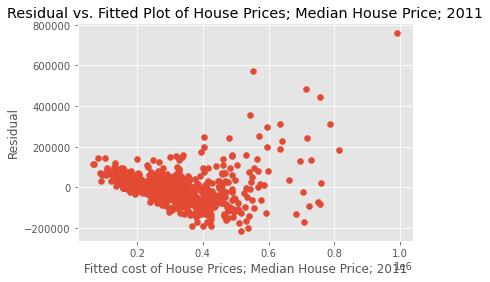

In [35]:
#Residual Analysis

# plot 
plt.scatter(model_2011.fittedvalues, model_2011.resid)
# adding title and labels
plt.xlabel('Fitted cost of House Prices; Median House Price; 2011')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of House Prices; Median House Price; 2011')
plt.show()

In [61]:
VIF_dropped = df_predictors_selected_VIF.drop(['Area and Density; Population density (persons per sq km); 2011 (Census)','Diversity; Religion - 2011 Census; Jewish'], axis=1)

In [62]:
model_2011_dropped = sm.OLS(endog=info_clean[['House Prices; Median House Price; 2011']], exog=sm.add_constant(VIF_dropped)).fit()
model_2011_dropped.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     House Prices; Median House Price; 2011   R-squared:                       0.692
Model:                                                OLS   Adj. R-squared:                  0.685
Method:                                     Least Squares   F-statistic:                     91.73
Date:                                    Fri, 03 Dec 2021   Prob (F-statistic):          2.06e-145
Time:                                            21:13:27   Log-Likelihood:                -8048.7
No. Observations:                                     628   AIC:                         1.613e+04
Df Residuals:                                         612   BIC:                         1.620e+04
Df Model:                                              15                                         
Covariance Type:                                nonrobust                                         
=======================================================================================================================================================================================
                                                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                               -1.846e+06    3.2e+05     -5.761      0.000   -2.47e+06   -1.22e+06
Births and deaths; General Fertility Rate (GFR); 2011                                                               -1533.7430    304.203     -5.042      0.000   -2131.151    -936.335
Births and deaths; Standardised Mortality Ratio (SMR); 2011                                                          1195.8791    312.674      3.825      0.000     581.835    1809.924
Life Expectancy; Male life expectancy; 2007-2011                                                                     1.853e+04   2834.368      6.537      0.000     1.3e+04    2.41e+04
Life Expectancy; Female life expectancy; 2007-2011                                                                   1.095e+04   2613.958      4.190      0.000    5818.936    1.61e+04
Employment; Economic Activity (Percentages) - 2011 Census; Economically Inactive %                                   1.342e+04   1652.021      8.121      0.000    1.02e+04    1.67e+04
Employment; Economic Activity (Percentages) - 2011 Census; Aged 16 to 24: % Unemployed                               -404.7421    180.599     -2.241      0.025    -759.411     -50.073
Employment; Lone Parent Not in Employment - 2011 Census; Lone parent not in employment %                             2739.3065    668.613      4.097      0.000    1426.253    4052.360
Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Apprenticeship         -3.716e+04   7249.425     -5.126      0.000   -5.14e+04   -2.29e+04
Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 3 qualifications -1.582e+04   2584.353     -6.122      0.000   -2.09e+04   -1.07e+04
Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Other qualifications   -5360.6466   1561.777     -3.432      0.001   -8427.739   -2293.554
Jobseekers Allowance; JSA Claimant Rate; 2011                                                                        -2.69e+04   2691.295     -9.995      0.000   -3.22e+04   -2.16e+04
Health and Disability; General Health - 2011 Census; % People whose Day-to-day activities are limited a

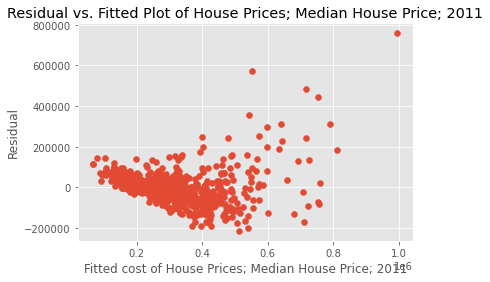

In [63]:
#Residual Analysis

# plot 
plt.scatter(model_2011_dropped.fittedvalues, model_2011.resid)
# adding title and labels
plt.xlabel('Fitted cost of House Prices; Median House Price; 2011')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of House Prices; Median House Price; 2011')
plt.show()

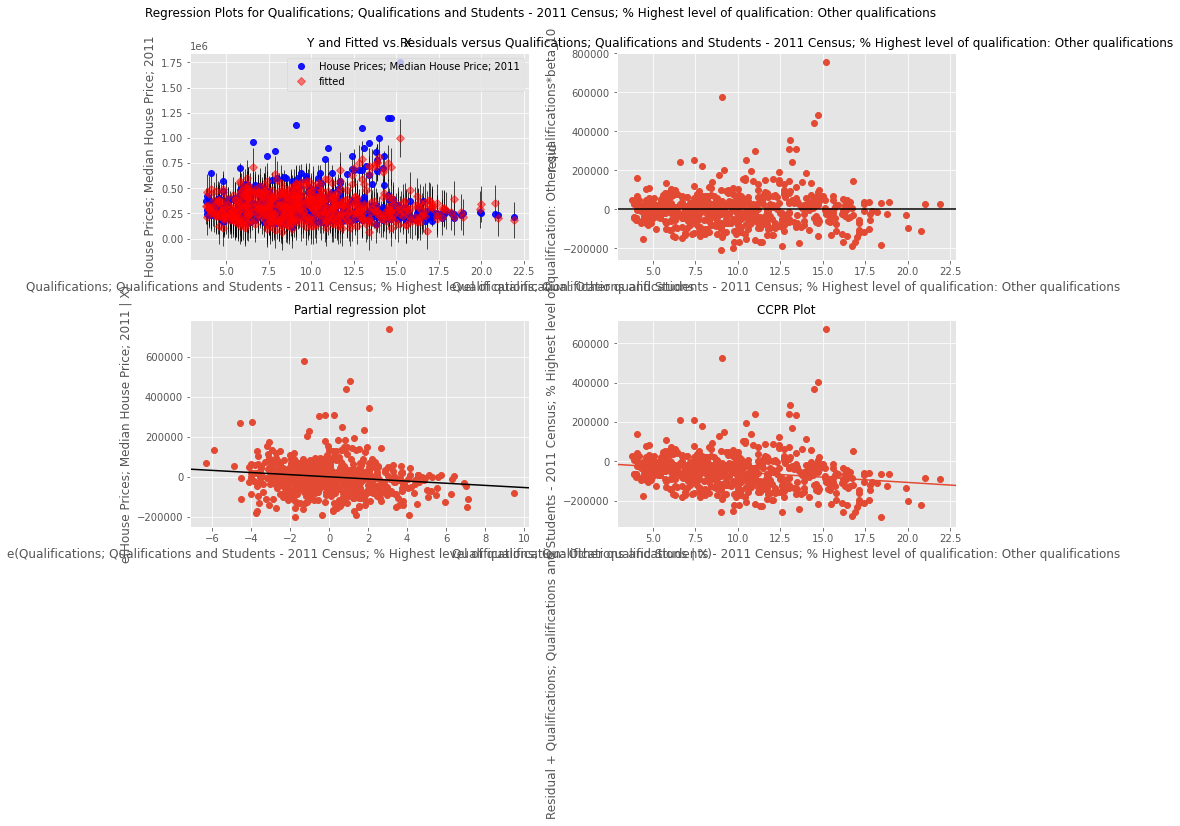

In [75]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_2011_dropped, 'Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Other qualifications', fig=fig)

In [68]:
VIF_dropped_2 = VIF_dropped.drop(['Life Expectancy; Male life expectancy; 2007-2011',
                                                 'Life Expectancy; Female life expectancy; 2007-2011',
                                                'Employment; Economic Activity (Percentages) - 2011 Census; Aged 16 to 24: % Unemployed',
                                                'Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Level 3 qualifications',
                                                'Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Apprenticeship',
                                                'Car access; Number of cars or vans in household % - Census 2011; 4 or more cars or vans in household %',
                                                'Travel to work by bicycle; 2011 Census; % travel by bicycle',
                                 'Qualifications; Qualifications and Students - 2011 Census; % Highest level of qualification: Other qualifications'], axis=1)

In [69]:
model_2011_dropped_2 = sm.OLS(endog=info_clean[['House Prices; Median House Price; 2011']], exog=sm.add_constant(VIF_dropped_2)).fit()
model_2011_dropped_2.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                      
==================================================================================================
Dep. Variable:     House Prices; Median House Price; 2011   R-squared:                       0.540
Model:                                                OLS   Adj. R-squared:                  0.535
Method:                                     Least Squares   F-statistic:                     104.0
Date:                                    Fri, 03 Dec 2021   Prob (F-statistic):          2.98e-100
Time:                                            21:14:17   Log-Likelihood:                -8174.7
No. Observations:                                     628   AIC:                         1.637e+04
Df Residuals:                                         620   BIC:                         1.640e+04
Df Model:                                               7                                         
Covariance Type:                                nonrobust                                         
===============================================================================================================================================================================
                                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                                        7.807e+05   6.32e+04     12.359      0.000    6.57e+05    9.05e+05
Births and deaths; General Fertility Rate (GFR); 2011                                                       -1523.5885    313.936     -4.853      0.000   -2140.096    -907.081
Births and deaths; Standardised Mortality Ratio (SMR); 2011                                                  -943.8913    265.672     -3.553      0.000   -1465.618    -422.165
Employment; Economic Activity (Percentages) - 2011 Census; Economically Inactive %                           5836.3643   1328.464      4.393      0.000    3227.530    8445.198
Employment; Lone Parent Not in Employment - 2011 Census; Lone parent not in employment %                     6368.3058    707.914      8.996      0.000    4978.107    7758.505
Jobseekers Allowance; JSA Claimant Rate; 2011                                                               -3.012e+04   2720.142    -11.071      0.000   -3.55e+04   -2.48e+04
Health and Disability; General Health - 2011 Census; % People whose Day-to-day activities are limited a lot -4.121e+04   4225.215     -9.753      0.000   -4.95e+04   -3.29e+04
Car access; Number of cars or vans in household % - Census 2011; 1 car or van in household %                -6828.5167    982.468     -6.950      0.000   -8757.884   -4899.149
==============================================================================
Omnibus:                      318.190   Durbin-Watson:                   1.315
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3148.318
Skew:                           2.026   Prob(JB):                         0.00
Kurtosis:                      13.193   Cond. No.                     1.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

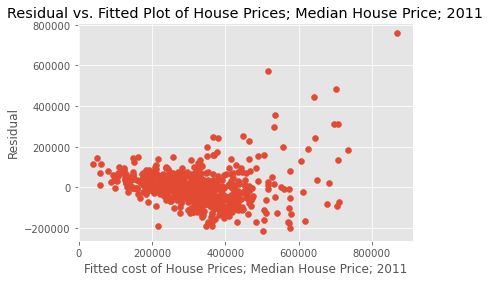

In [70]:
#Residual Analysis

# plot 
plt.scatter(model_2011_dropped_2.fittedvalues, model_2011.resid)
# adding title and labels
plt.xlabel('Fitted cost of House Prices; Median House Price; 2011')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of House Prices; Median House Price; 2011')
plt.show()

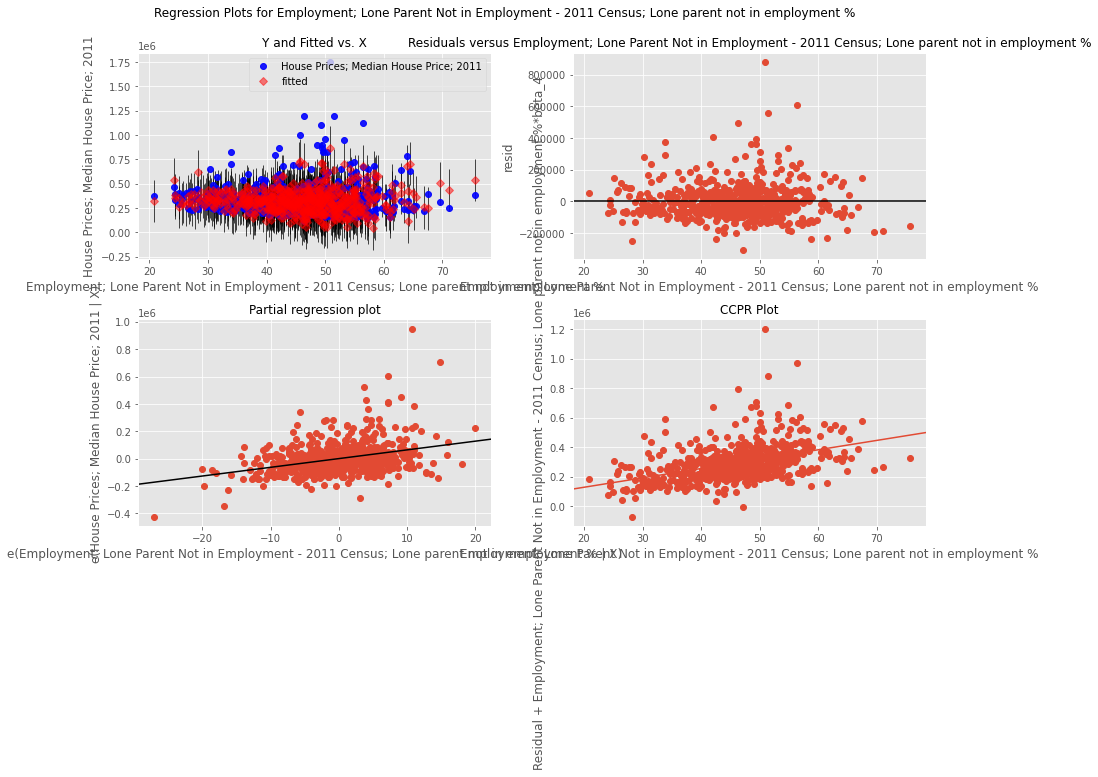

In [72]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_2011_dropped_2, 'Employment; Lone Parent Not in Employment - 2011 Census; Lone parent not in employment %', fig=fig)